In [11]:
%config Completer.use_jedi=False

1.객체 생성

2.데이터확인

3.데이터 추출

4.결측데이터

5.데이터가공

6.데이터합치기

7.그룹화

8.변형,구조변경

9.시계열

10.범주화

11.그래프

12.데이터입출력

13.감잡음

In [3]:
dir(pd) #pd(pandas)의 기능

['BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_hashtable',
 '_is_numpy_dev',
 '_lib',
 '_libs',
 '_np_version_under1p17',
 '_np_version_under1p18',
 '_testing'

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
#사용라이브러리 버전 확인
print("pandas= ",pd.__version__)
print("numpy= ",np.__version__)
print("seaborn= ",sns.__version__)

pandas=  1.2.4
numpy=  1.20.1
seaborn=  0.11.1


In [7]:
import matplotlib as mpl
print("matplotlib=",mpl.__version__)

matplotlib= 3.3.4


In [2]:
s= pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [9]:
dates= pd.date_range("20130101",periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
dates1= pd.date_range("20130101",periods=6, freq="W") #freq를 통해 월,연으로도 구성가능
dates1

DatetimeIndex(['2013-01-06', '2013-01-13', '2013-01-20', '2013-01-27',
               '2013-02-03', '2013-02-10'],
              dtype='datetime64[ns]', freq='W-SUN')

### class pandas.Series(data=None,index=None,dtype=None,name=None,copy=False,fastpath=False)
1.data => series로 만들 데이터

2.index => series 인덱스로 사용할 데이터, 없으면 seq자동부여

3.dtype => series의 데이터타입

4.name =>series의 이름부여

5.copy => True면 deep.copy()

6.fastpath= > 내부사용파라미터

In [11]:
# 1
pd.Series(data=["1","2","3","4","5"])

0    1
1    2
2    3
3    4
4    5
dtype: object

In [12]:
# 2
pd.Series(data=["1","2","3","4","5"], index=["a","b","c","d","e"])

a    1
b    2
c    3
d    4
e    5
dtype: object

In [14]:
# 3
pd.Series(data=["1","2","3","4","5"], index=["a","b","c","d","e"], dtype=float) #np.int64같이 numpy의 자료혀으로도 줄수있다.

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
dtype: float64

In [15]:
# 4
pd.Series(data=["1","2","3","4","5"], index=["a","b","c","d","e"], dtype=float, name="new data")

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
Name: new data, dtype: float64

In [20]:
# 5
pd.Series(data=["1","2","3","4","5"], index=["a","b","c","d","e"], dtype=float, name="new data", 
          copy=True) #원래 copy의 기본값은 false => 하나를 변경하면 같이 변경되는데, true로 하면 copy해도 각자 변경됨.


a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
Name: new data, dtype: float64

### pandas.DataFrame(data=None,columns=None,dtype=None,copy=False)

In [ ]:
#랜덤하게 6행4열 데이터만듦
#np.random.randn(6,4) <=리스트 안에 리스트로 반환됨.
#이를 Dataframe으로 변경도 가능 pd.DataFrame()안에 넣어서
#np.random.seed(0) <=를 앞에 넣어주면 동일한 랜덤값을 늘 제공. ()안에 숫자를 바꿔주면 랜덤값이 바뀜.
#(1)로 주면 0과 값만다를뿐 랜덤값은 계속 1의 랜덤값으로 고정됨.

In [133]:
df=pd.DataFrame(np.random.randn(6,4),index=dates,columns=list("ABCD")) #list('ABCD') =>['a','b','c','d']
df

,A,B,C,D
2013-01-01,1.404930,-1.500998,-1.825126,-0.145735
2013-01-02,-1.726538,1.273517,1.283132,0.707239
2013-01-03,-2.078497,-1.053925,0.319235,2.795292
2013-01-04,-0.430759,0.065841,1.130465,0.132849
2013-01-05,-1.951309,0.176702,0.199040,0.840748
2013-01-06,0.116010,-0.621789,0.217615,0.780382


In [23]:
#dict데이터로 dataframe만들기 (cf.가로로 값을 주면 list형태로 값을주는것)
df2 = pd.DataFrame({ 
     "A": 1.0,
     "B": pd.Timestamp("20130102"),
     "C": pd.Series(1, index=list(range(4)), dtype="float32"), #range(4)= length: 4
     "D": np.array([3] * 4, dtype="int32"),
     "E": pd.Categorical(["test", "train", "test", "train"]), #다양한값을 가질수있음 dataframe장점
     "F": "foo",
    })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       4 non-null      float64       
 1   B       4 non-null      datetime64[ns]
 2   C       4 non-null      float32       
 3   D       4 non-null      int32         
 4   E       4 non-null      category      
 5   F       4 non-null      object        
dtypes: category(1), datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 288.0+ bytes


In [8]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [25]:
dir(df2) #여기서 __ 어쩌구 __ 는 내장함수임 #A,B..는 우리가 만든거

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv

In [13]:
df.head()

,A,B,C,D
2013-01-01,0.040474,-1.240285,0.078518,0.774259
2013-01-02,-0.547936,-2.331448,-1.570181,-0.423489
2013-01-03,-0.929036,-0.353284,0.191133,-1.348837
2013-01-04,0.528141,0.906967,-1.528359,-0.427428
2013-01-05,0.586358,-0.453112,-0.792566,-0.161148


In [14]:
df.tail()

,A,B,C,D
2013-01-02,-0.547936,-2.331448,-1.570181,-0.423489
2013-01-03,-0.929036,-0.353284,0.191133,-1.348837
2013-01-04,0.528141,0.906967,-1.528359,-0.427428
2013-01-05,0.586358,-0.453112,-0.792566,-0.161148
2013-01-06,1.354386,0.028506,1.363253,0.729166


In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [26]:
df.columns
#만약 column 바꾸고 싶으면 df.columns=["1","2","3","4"] 이렇게 변경가능
#or df.rename(columns={"A":"1","B":"2"},inplace=True) 이렇게도 변경가능(이전이름:바꿀이름, 부분만수정가능)

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.to_numpy() #data만 뽑아서 array형태로 넘겨줌

array([[ 0.0404738 , -1.24028455,  0.07851819,  0.77425913],
       [-0.54793561, -2.33144814, -1.57018148, -0.42348932],
       [-0.92903627, -0.35328448,  0.19113312, -1.3488372 ],
       [ 0.52814061,  0.90696659, -1.52835934, -0.42742797],
       [ 0.58635772, -0.45311173, -0.79256605, -0.16114831],
       [ 1.3543861 ,  0.02850554,  1.36325282,  0.72916609]])

In [27]:
aa=[]
for i in range(0,10):
    a1=i*10
    a2=i**2
    a3="1234"
    aa.append([a1,a2,a3]) #3가지 변수를 하나의 row의 데이터로 만듦.
aa[:3]

[[0, 0, '1234'], [10, 1, '1234'], [20, 4, '1234']]

In [28]:
pd.DataFrame(aa) #dataframe으로 만듦

,0,1,2
0,0,0,1234
1,10,1,1234
2,20,4,1234
3,30,9,1234
4,40,16,1234
5,50,25,1234
6,60,36,1234
7,70,49,1234
8,80,64,1234
9,90,81,1234


In [30]:
pd.DataFrame(aa, columns=["이름","나이","성별"]).head(3)

,이름,나이,성별
0,0,0,1234
1,10,1,1234
2,20,4,1234


In [32]:
#위의결과와 같은 다른방법(columns지정)
dd= pd.DataFrame(aa)
dd.columns=["이름","나이","성별"]
dd.head(3)

,이름,나이,성별
0,0,0,1234
1,10,1,1234
2,20,4,1234


In [18]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [33]:
# df.to_numpy()가 안될경우 pandas version확인
# conda uninstall pandas
# conda install pandas ==0.24.0 (버전지정해서 깔아줄것)

In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.172064,-0.573776,-0.376367,-0.142913
std,0.829994,1.109249,1.138486,0.801996
min,-0.929036,-2.331448,-1.570181,-1.348837
25%,-0.400833,-1.043491,-1.344411,-0.426443
50%,0.284307,-0.403198,-0.357024,-0.292319
75%,0.571803,-0.066942,0.162979,0.506587
max,1.354386,0.906967,1.363253,0.774259


In [20]:
df.T #전치(ROw, COl을 바꿈 => df자체가 바뀌진않기때문에 저장하려면 변수하나주고 거기다저장해야함)

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.040474,-0.547936,-0.929036,0.528141,0.586358,1.354386
B,-1.240285,-2.331448,-0.353284,0.906967,-0.453112,0.028506
C,0.078518,-1.570181,0.191133,-1.528359,-0.792566,1.363253
D,0.774259,-0.423489,-1.348837,-0.427428,-0.161148,0.729166


In [21]:
df.sort_index(axis=1,ascending=False) #axis=0이면 row단위(날짜), 1이면 column단위(abcd) ascending=> sort순서

,D,C,B,A
2013-01-01,0.774259,0.078518,-1.240285,0.040474
2013-01-02,-0.423489,-1.570181,-2.331448,-0.547936
2013-01-03,-1.348837,0.191133,-0.353284,-0.929036
2013-01-04,-0.427428,-1.528359,0.906967,0.528141
2013-01-05,-0.161148,-0.792566,-0.453112,0.586358
2013-01-06,0.729166,1.363253,0.028506,1.354386


In [22]:
df.sort_values(by="B") #column B기준정렬

,A,B,C,D
2013-01-02,-0.547936,-2.331448,-1.570181,-0.423489
2013-01-01,0.040474,-1.240285,0.078518,0.774259
2013-01-05,0.586358,-0.453112,-0.792566,-0.161148
2013-01-03,-0.929036,-0.353284,0.191133,-1.348837
2013-01-06,1.354386,0.028506,1.363253,0.729166
2013-01-04,0.528141,0.906967,-1.528359,-0.427428


### 실습
1. winequality-red.csv를 읽어서 red_df 데이터 프레임으로 만들기
2. winequality-white.csv를 읽어서 white.df 데이터 프레임으로 만들기

In [34]:
red_url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
#red_url="c:/hrim/winequality.red.csv" 요렇게도 줄수있음.
white_url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

In [36]:
pd.read_csv(red_url, sep=";") #csv 파일이 ;로 구분되어 한줄로 나와있기때문 띠리서 ;로 구분

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [37]:
red_df=pd.read_csv(red_url,sep=";") #delimiter=";"로 줄수도있음
white_df=pd.read_csv(white_url,sep=";")

In [38]:
red_df.to_numpy()

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

#### red_df pH가 가장 큰 숫자 5개를 추출하세요.

In [39]:
red_df["pH"] #=red_df.pH

0       3.51
1       3.20
2       3.26
3       3.16
4       3.51
        ... 
1594    3.45
1595    3.52
1596    3.42
1597    3.57
1598    3.39
Name: pH, Length: 1599, dtype: float64

In [40]:
red_df.sort_values(by="pH")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4
544,14.3,0.310,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6
614,9.2,0.755,0.18,2.2,0.148,10.0,103.0,0.99690,2.87,1.36,10.2,6
440,12.6,0.310,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
1470,10.0,0.690,0.11,1.4,0.084,8.0,24.0,0.99578,2.88,0.47,9.7,5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
695,5.1,0.470,0.02,1.3,0.034,18.0,44.0,0.99210,3.90,0.62,12.8,6
1316,5.4,0.740,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6


In [44]:
red_df.sort_values(by="pH", ascending=False).head(10) #dataFrame의 데이터프레임 10개뽑아오는것.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1316,5.4,0.740,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
1321,5.0,0.740,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
695,5.1,0.470,0.02,1.30,0.034,18.0,44.0,0.99210,3.90,0.62,12.8,6
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
95,4.7,0.600,0.17,2.30,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6
1300,5.2,0.645,0.00,2.15,0.080,15.0,28.0,0.99444,3.78,0.61,12.5,6
1111,5.4,0.420,0.27,2.00,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,7
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
1491,5.6,0.540,0.04,1.70,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5


In [45]:
red_df.sort_values(by="pH", ascending=False).head(10)["pH"] #뽑아온 데이터중에 pH만 보겠다.

1316    4.01
1321    4.01
695     3.90
45      3.90
95      3.85
1300    3.78
1111    3.78
94      3.75
553     3.74
1491    3.72
Name: pH, dtype: float64

In [46]:
#또다른 방법
red_df["pH"].sort_values(ascending=False).head(10) #series를 뽑아와 10개를 뽑은것

1316    4.01
1321    4.01
695     3.90
45      3.90
95      3.85
1300    3.78
1111    3.78
94      3.75
553     3.74
1491    3.72
Name: pH, dtype: float64

In [47]:
red_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [49]:
red_df["quality"].value_counts() #등급 5가 681개...

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### 데이터 추출

In [23]:
df["A"] #col="A" 데이터추출

2013-01-01    0.040474
2013-01-02   -0.547936
2013-01-03   -0.929036
2013-01-04    0.528141
2013-01-05    0.586358
2013-01-06    1.354386
Freq: D, Name: A, dtype: float64

In [51]:
df[["A","C"]] # 여러개 추출시 리스트형으로 넣어줘야함을 기억
#= 다음 두줄 실행과 결과가 같다.
#sel_col=["A","C"]
#df[sel_col]

,A,C
2013-01-01,1.353175,0.755085
2013-01-02,0.686059,0.859955
2013-01-03,-1.191970,-1.498248
2013-01-04,-0.460101,-0.711229
2013-01-05,0.143688,2.603302
2013-01-06,1.260522,-0.254709


### red_df를 읽어서 pH,alcohol, density,quality로 구성된 new_red를 만드세요

In [53]:
new_red = red_df[["pH","alcohol","density","quality"]]
new_red

,pH,alcohol,density,quality
0,3.51,9.4,0.99780,5
1,3.20,9.8,0.99680,5
2,3.26,9.8,0.99700,5
3,3.16,9.8,0.99800,6
4,3.51,9.4,0.99780,5
...,...,...,...,...
1594,3.45,10.5,0.99490,5
1595,3.52,11.2,0.99512,6
1596,3.42,11.0,0.99574,6
1597,3.57,10.2,0.99547,5


In [54]:
new_red.describe()

,pH,alcohol,density,quality
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,3.311113,10.422983,0.996747,5.636023
std,0.154386,1.065668,0.001887,0.807569
min,2.740000,8.400000,0.990070,3.000000
25%,3.210000,9.500000,0.995600,5.000000
50%,3.310000,10.200000,0.996750,6.000000
75%,3.400000,11.100000,0.997835,6.000000
max,4.010000,14.900000,1.003690,8.000000


###pH 이상치 점검
1. low, high값 구하고
- q1=new_red["pH"].quantile(0.25)=> 25%값 구해줌.
- q3=new_red["pH"].quantile(0.75)
- iqr = q3 - q1
- low = q1-1.5 * iqr
- high = q3 + 1.5 * iqr
2. low 값보다 적고, high보다 큰 이상값은 몇개인지 구하시오.

In [64]:
q1=new_red["pH"].quantile(0.25)
q3=new_red["pH"].quantile(0.75)
iqr = q3 - q1
low = q1-1.5 * iqr
high = q3 + 1.5 * iqr #요기까지는 공식

count1 = 0
count2 = 0

print("low= ",low)
print("high= ",high)

for i in new_red["pH"]:
    if i< low:
        count1 += 1

    elif i> high:
        count2 += 1

print("low값보다 적은 이상치 =",count1)
# print("이상치 데이터는 총 {}건입니다".format(count))
print("high값보다 큰 이상치 =",count2)


low=  2.925
high=  3.6849999999999996
low값보다 적은 이상치 = 14
high값보다 큰 이상치 = 21


In [65]:
new_red[new_red["pH"]<low] #조건에[] 맞는 전체 data(new_red) 보여줌

,pH,alcohol,density,quality
151,2.74,9.4,0.99960,4
440,2.88,9.8,0.99870,8
544,2.86,8.4,1.00080,6
554,2.92,11.1,1.00315,5
555,2.92,11.1,1.00315,5
557,2.92,11.1,1.00315,5
614,2.87,10.2,0.99690,6
650,2.89,9.6,0.99860,5
656,2.89,9.6,0.99860,5
657,2.92,10.5,0.99800,7


In [73]:
new_red[new_red["pH"]<low].shape

(14, 4)

In [66]:
new_red[new_red["pH"]<low].shape[0] #row의 개수

14

In [67]:
new_red[new_red["pH"]>high].shape[0]

21

In [68]:
#전체 개수
new_red[(new_red["pH"]<low) | (new_red["pH"]>high)].shape[0] 
#이때 or는 못씀. 데이터유형에 따라 or 못쓰는게 있는데 series도 못쓰기떄문에 |로 해준다.

35

In [70]:
new=new_red[(new_red["pH"]<low) | (new_red["pH"]>high)]
new["pH"].count()

35

In [71]:
len(new)

35

-----까지 실습

In [24]:
df[0:3]

,A,B,C,D
2013-01-01,0.040474,-1.240285,0.078518,0.774259
2013-01-02,-0.547936,-2.331448,-1.570181,-0.423489
2013-01-03,-0.929036,-0.353284,0.191133,-1.348837


In [25]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.547936,-2.331448,-1.570181,-0.423489
2013-01-03,-0.929036,-0.353284,0.191133,-1.348837
2013-01-04,0.528141,0.906967,-1.528359,-0.427428


In [74]:
#selection by label
dates[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [26]:
#label 을 통한 추출 df.loc[]
df.loc[dates[0]]

A    0.040474
B   -1.240285
C    0.078518
D    0.774259
Name: 2013-01-01 00:00:00, dtype: float64

In [75]:
df.loc[dates[0]].values #array형태로 반환. (df의 첫번쨰 행 데이터임)

array([ 1.35317518, -0.04377489,  0.75508549, -0.1135911 ])

In [27]:
#여러 컬럼 데이터 추출 (리스트 형태로 들어가야함을 기억)
#df.loc[row,col] #col=['col1','col2']
df.loc[:,["A","B"]]

# =
# sel_col=["A","B"]
# df.loc={:,sel_col}

,A,B
2013-01-01,0.040474,-1.240285
2013-01-02,-0.547936,-2.331448
2013-01-03,-0.929036,-0.353284
2013-01-04,0.528141,0.906967
2013-01-05,0.586358,-0.453112
2013-01-06,1.354386,0.028506


In [28]:
#데이터 슬라이싱(헁,열 지정)
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.547936,-2.331448
2013-01-03,-0.929036,-0.353284
2013-01-04,0.528141,0.906967


In [76]:
df.loc[dates[1:3], ["A", "B"]] #dates안넣고 [1:3]만넣으면 error

,A,B
2013-01-02,0.686059,0.910355
2013-01-03,-1.191970,1.099994


In [29]:
#20130102 하나의 row만 가져옴
df.loc["20130102", ["A", "B"]]

A   -0.547936
B   -2.331448
Name: 2013-01-02 00:00:00, dtype: float64

In [30]:
#스칼라값 구하기 (특정한 행과열에 위치한 하나의 데이터=스칼라값)
df.loc[dates[0], "A"]

0.04047379638336664

In [31]:
#스칼라값 빠르게 구하기 (행과열체크안하고 바로 값비교)
df.at[dates[0], "A"]

0.04047379638336664

### selection by position

In [32]:
#position 통한 추출 즉, index를 가지고 접근 위에서 3번째 데이터의 행을 다 가져옴
df.iloc[3]
#df.iloc[3] = [1,2,3,4] <- 요렇게 추출해서 대입하면 값도 바꿀수있다.

A    0.528141
B    0.906967
C   -1.528359
D   -0.427428
Name: 2013-01-04 00:00:00, dtype: float64

In [33]:
#정수로 표기된 row, col 슬라이싱 (3~5행, 0~2열만 가져오기. 이때 마지막값은 -1한 값까지가져옴. 3~5면 3,4만가져온단소리)
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.528141,0.906967
2013-01-05,0.586358,-0.453112


In [34]:
df.iloc[[1, 2, 4], [0, 2]] #행을 1,2,4만 지정할수도 있다.열도 마찬가지

,A,C
2013-01-02,-0.547936,-1.570181
2013-01-03,-0.929036,0.191133
2013-01-05,0.586358,-0.792566


In [35]:
#전체열
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.547936,-2.331448,-1.570181,-0.423489
2013-01-03,-0.929036,-0.353284,0.191133,-1.348837


In [36]:
#전체행
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.240285,0.078518
2013-01-02,-2.331448,-1.570181
2013-01-03,-0.353284,0.191133
2013-01-04,0.906967,-1.528359
2013-01-05,-0.453112,-0.792566
2013-01-06,0.028506,1.363253


In [37]:
#특정 행, 열
df.iloc[1, 1]

-2.331448144659488

In [38]:
#스칼라를 빠르게 추출
df.iat[1, 1]
#얘도 마찬가지로 추출해서 대입하면 값 수정도 가능

-2.331448144659488

### boolean indexing

In [80]:
#특정조건을 만족한 값을 추출 => 데이터프레임형태.
df[df["A"] > 0]
# = df.A>0
#df[df["A"] > 0]["A"] =>Series 추출도 가능하다. (A행만 가져온것임)

,A,B,C,D
2013-01-01,1.353175,-0.043775,0.755085,-0.113591
2013-01-02,0.686059,0.910355,0.859955,-0.462669
2013-01-05,0.143688,1.459081,2.603302,1.206640
2013-01-06,1.260522,-0.738351,-0.254709,0.117275


In [78]:
#둘다 만족하는 경우 추출 (or이면 |)
df[(df.A>0)& (df.A<1)]

,A,B,C,D
2013-01-02,0.686059,0.910355,0.859955,-0.462669
2013-01-05,0.143688,1.459081,2.603302,1.206640


In [40]:
#만족하지 않는 값들은 NaN으로 채운다
df[df > 0]

,A,B,C,D
2013-01-01,0.040474,NaN,0.078518,0.774259
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,0.191133,NaN
2013-01-04,0.528141,0.906967,NaN,NaN
2013-01-05,0.586358,NaN,NaN,NaN
2013-01-06,1.354386,0.028506,1.363253,0.729166


In [85]:
#새로운 컬럼추가
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
#df2["E"] = "1" 하면 1로만 6개 채워짐
df2

,A,B,C,D,E
2013-01-01,1.353175,-0.043775,0.755085,-0.113591,one
2013-01-02,0.686059,0.910355,0.859955,-0.462669,one
2013-01-03,-1.191970,1.099994,-1.498248,0.231783,two
2013-01-04,-0.460101,-0.503263,-0.711229,0.456781,three
2013-01-05,0.143688,1.459081,2.603302,1.206640,four
2013-01-06,1.260522,-0.738351,-0.254709,0.117275,three


In [86]:
df2[df2["E"].isin(["two","four"])] #two, four만 가지고 있는 특정 row를 가져옴

,A,B,C,D,E
2013-01-03,-1.191970,1.099994,-1.498248,0.231783,two
2013-01-05,0.143688,1.459081,2.603302,1.206640,four


### Setting

In [90]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6)) #0102부터 넣어주는데 01이있을경우 NaN이됨
s1
df2["F"]=s1
df2

,A,B,C,D,E,F
2013-01-01,1.353175,-0.043775,0.755085,-0.113591,one,NaN
2013-01-02,0.686059,0.910355,0.859955,-0.462669,one,1.0
2013-01-03,-1.191970,1.099994,-1.498248,0.231783,two,2.0
2013-01-04,-0.460101,-0.503263,-0.711229,0.456781,three,3.0
2013-01-05,0.143688,1.459081,2.603302,1.206640,four,4.0
2013-01-06,1.260522,-0.738351,-0.254709,0.117275,three,5.0


In [87]:
df.at[dates[0], "A"] = 0
df

,A,B,C,D
2013-01-01,0.000000,-0.043775,0.755085,-0.113591
2013-01-02,0.686059,0.910355,0.859955,-0.462669
2013-01-03,-1.191970,1.099994,-1.498248,0.231783
2013-01-04,-0.460101,-0.503263,-0.711229,0.456781
2013-01-05,0.143688,1.459081,2.603302,1.206640
2013-01-06,1.260522,-0.738351,-0.254709,0.117275


In [88]:
df.iat[0, 1] = 0
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.755085,-0.113591
2013-01-02,0.686059,0.910355,0.859955,-0.462669
2013-01-03,-1.191970,1.099994,-1.498248,0.231783
2013-01-04,-0.460101,-0.503263,-0.711229,0.456781
2013-01-05,0.143688,1.459081,2.603302,1.206640
2013-01-06,1.260522,-0.738351,-0.254709,0.117275


In [89]:
df.loc[:, "D"] = np.array([5] * len(df)) #전체행의 D컬럼을 바꿔줌
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.755085,5
2013-01-02,0.686059,0.910355,0.859955,5
2013-01-03,-1.191970,1.099994,-1.498248,5
2013-01-04,-0.460101,-0.503263,-0.711229,5
2013-01-05,0.143688,1.459081,2.603302,5
2013-01-06,1.260522,-0.738351,-0.254709,5


In [91]:
np.array([5] * len(df)) #배열임을 확인

array([5, 5, 5, 5, 5, 5])

In [47]:
df2 = df.copy()
df2[df2 > 0] = -df2 # + 값 -로 -값 +로
df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.078518,-5
2013-01-02,-0.547936,-2.331448,-1.570181,-5
2013-01-03,-0.929036,-0.353284,-0.191133,-5
2013-01-04,-0.528141,-0.906967,-1.528359,-5
2013-01-05,-0.586358,-0.453112,-0.792566,-5
2013-01-06,-1.354386,-0.028506,-1.363253,-5


### 결측데이터

In [95]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1 #2개만 1넣음. => 결측 데이터 만드는 작업
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.755085,5,1.0
2013-01-02,0.686059,0.910355,0.859955,5,1.0
2013-01-03,-1.191970,1.099994,-1.498248,5,NaN
2013-01-04,-0.460101,-0.503263,-0.711229,5,NaN


In [51]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


In [49]:
#결측치 행 제거 (nan값 삭제)
df1.dropna(how="any") #any/all -> any는 Nan값이 1개라도 존재하면 지우고 all은 모두가 NAN이어야 지움

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.078518,5,1.0
2013-01-02,-0.547936,-2.331448,-1.570181,5,1.0


In [50]:
df1.fillna(value=5) # NaN 값을 5로 채워줌

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.078518,5,1.0
2013-01-02,-0.547936,-2.331448,-1.570181,5,1.0
2013-01-03,-0.929036,-0.353284,0.191133,5,5.0
2013-01-04,0.528141,0.906967,-1.528359,5,5.0


In [98]:
df1["E"]=df1["E"].fillna(df1["E"].mean()) #평균값으로 채워줄 수도 있음.
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.755085,5,1.0
2013-01-02,0.686059,0.910355,0.859955,5,1.0
2013-01-03,-1.191970,1.099994,-1.498248,5,1.0
2013-01-04,-0.460101,-0.503263,-0.711229,5,1.0


In [101]:
df1.isnull()

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,False


In [99]:
#null 값이 있는지 체크 하기도 함.
df1.isnull().sum()
#df1.isnull().count()

A    0
B    0
C    0
D    0
E    0
dtype: int64

In [100]:
df1.isnull().count()

A    4
B    4
C    4
D    4
E    4
dtype: int64

### 통계

In [52]:
df.mean()

A    0.165319
B   -0.367062
C   -0.376367
D    5.000000
dtype: float64

In [54]:
df.mean(1)

2013-01-01    1.269630
2013-01-02    0.137609
2013-01-03    0.977203
2013-01-04    1.226687
2013-01-05    1.085170
2013-01-06    1.936536
Freq: D, dtype: float64

In [104]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates)
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [55]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2) #2개씩 값을 민다. 1->3번으로 이런식. -값을 주면 위로 민다.
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [56]:
df.sub(s, axis="index") #df-s : df에서 s값을 뺸다. 

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.929036,-1.353284,-0.808867,4.0
2013-01-04,-2.471859,-2.093033,-4.528359,2.0
2013-01-05,-4.413642,-5.453112,-5.792566,0.0
2013-01-06,NaN,NaN,NaN,NaN


In [134]:
df

,A,B,C,D
2013-01-01,1.404930,-1.500998,-1.825126,-0.145735
2013-01-02,-1.726538,1.273517,1.283132,0.707239
2013-01-03,-2.078497,-1.053925,0.319235,2.795292
2013-01-04,-0.430759,0.065841,1.130465,0.132849
2013-01-05,-1.951309,0.176702,0.199040,0.840748
2013-01-06,0.116010,-0.621789,0.217615,0.780382


In [57]:
#데이터에 함수적용 : cumsum-> 누적합. apply -> 전체값에 다 적용 (누적값을 다 적용해주는것임)
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,0.078518,5
2013-01-02,-0.547936,-2.331448,-1.491663,10
2013-01-03,-1.476972,-2.684733,-1.300530,15
2013-01-04,-0.948831,-1.777766,-2.828890,20
2013-01-05,-0.362474,-2.230878,-3.621456,25
2013-01-06,0.991913,-2.202372,-2.258203,30


### lambda
1. 익명함수, 런타임에 생성해서 사용
2. def 함수와 동일
3. 임시로 한줄로 간결하게 만들고 없앨때 쓴다.

In [109]:
def fun(a):
    return a**2

fun(2)

4

In [110]:
# 위를 람다로
(lambda i:i**2)(2)

4

In [112]:
def sum_a(n,m):
    return n+m

sum_a(4,5)

9

In [113]:
(lambda n,m: n+m)(4,5) #여기서 사용되면 끝남

9

In [122]:
a=[1,2,3,4]
b=[17,12,11,10]

(lambda x,y: x+y.a,b)

(<function __main__.<lambda>(x, y)>, [17, 12, 11, 10])

In [126]:
map(lambda x,y: x+y,a,b)

In [125]:
list(map(lambda x,y: x+y,a,b))

[18, 14, 14, 14]

In [58]:
df.apply(lambda x: x.max() - x.min()) # apply : ()함수의 값을 df 에 적용시켜줌, X는 dataframe의 column

A    2.283422
B    3.238415
C    2.933434
D    0.000000
dtype: float64

### Histogramming

In [59]:
np.random.seed(123)
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    6
2    2
3    3
4    1
5    6
6    2
7    4
8    4
9    3
dtype: int32

In [60]:
s.value_counts() #s에 1이 몇개있는지..2가몇갠지..

1    2
2    2
3    2
4    2
6    2
dtype: int64

### String Methods

In [135]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower() #소문자로 바꿔준다. cf) 주의할것은 s.lower()하면 적용할수없다. =>s,str해서 str로 만들어줌.

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [136]:
s.str[0] #첫번째 글자만 뽑아옴

0      A
1      B
2      C
3      A
4      B
5    NaN
6      C
7      d
8      c
dtype: object

### Merge(데이터합치기)

In [140]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.294447,-0.433525,-0.700563,0.210302
1,0.297605,0.056065,-0.701323,-0.166228
2,-1.708751,-0.422561,0.343350,-0.236718
3,0.860031,-0.324853,-0.505535,0.428382
4,-0.745778,1.746548,1.194043,0.178199
5,-1.103942,1.464876,-0.227273,-1.542275
6,-0.732326,-0.015490,0.618796,0.535768
7,0.135326,-0.355858,-0.288747,0.475989
8,0.338454,0.151760,0.150407,-1.042542
9,0.989749,2.676713,-2.391685,-0.405938


In [141]:
df[:3]

,0,1,2,3
0,1.294447,-0.433525,-0.700563,0.210302
1,0.297605,0.056065,-0.701323,-0.166228
2,-1.708751,-0.422561,0.343350,-0.236718


In [145]:
df_a=df[:3]
df_a

,0,1,2,3
0,1.294447,-0.433525,-0.700563,0.210302
1,0.297605,0.056065,-0.701323,-0.166228
2,-1.708751,-0.422561,0.343350,-0.236718


In [144]:
df_b=df[3:7]
df_b

,0,1,2,3
3,0.860031,-0.324853,-0.505535,0.428382
4,-0.745778,1.746548,1.194043,0.178199
5,-1.103942,1.464876,-0.227273,-1.542275
6,-0.732326,-0.015490,0.618796,0.535768


In [146]:
df_c=df[7:]
df_c

,0,1,2,3
7,0.135326,-0.355858,-0.288747,0.475989
8,0.338454,0.151760,0.150407,-1.042542
9,0.989749,2.676713,-2.391685,-0.405938


In [147]:
pd.concat([df_a,df_b,df_c]) #b랑 c는 밑으로 붙여줌 #pd.concat([df_a,df_b,df_c],axis=1) 하면 옆으로 붙여줌

,0,1,2,3
0,1.294447,-0.433525,-0.700563,0.210302
1,0.297605,0.056065,-0.701323,-0.166228
2,-1.708751,-0.422561,0.343350,-0.236718
3,0.860031,-0.324853,-0.505535,0.428382
4,-0.745778,1.746548,1.194043,0.178199
5,-1.103942,1.464876,-0.227273,-1.542275
6,-0.732326,-0.015490,0.618796,0.535768
7,0.135326,-0.355858,-0.288747,0.475989
8,0.338454,0.151760,0.150407,-1.042542
9,0.989749,2.676713,-2.391685,-0.405938


In [142]:
pieces = [df[:3], df[3:7], df[7:]] #slice한걸 리스트로 묶었음 (dataframe-> list)
pieces

[          0         1         2         3
 0  1.294447 -0.433525 -0.700563  0.210302
 1  0.297605  0.056065 -0.701323 -0.166228
 2 -1.708751 -0.422561  0.343350 -0.236718,
           0         1         2         3
 3  0.860031 -0.324853 -0.505535  0.428382
 4 -0.745778  1.746548  1.194043  0.178199
 5 -1.103942  1.464876 -0.227273 -1.542275
 6 -0.732326 -0.015490  0.618796  0.535768,
           0         1         2         3
 7  0.135326 -0.355858 -0.288747  0.475989
 8  0.338454  0.151760  0.150407 -1.042542
 9  0.989749  2.676713 -2.391685 -0.405938]

In [63]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces) #데이터 프레임 합쳐주는 함수 concat, join="inner"하는 기능도 있음(같은 index끼리 붙여줌)
# concat의 경우 () 안에 iterable한 데이터가 다 올수있어서 pieces는 list 이지만 concat이 가능하다.
   # pd.concat(
   # objs: Union[Iterable[ForwardRef('NDFrame')], Mapping[Union[Hashable, NoneType], ForwardRef('NDFrame')]]

,0,1,2,3
0,0.239647,-0.247113,1.310361,-0.867723
1,0.614049,0.646547,0.488247,-0.277547
2,1.798488,-0.127149,1.852686,0.519371
3,0.262675,-0.851805,1.113946,-0.737775
4,-0.121911,-0.363538,-0.201595,0.497930
5,-0.017899,0.459103,0.040238,-0.236349
6,-2.106866,1.494078,-0.506291,-1.374707
7,-0.876485,-0.688760,-1.045093,0.807357
8,-0.712084,-2.613961,1.090286,1.337074
9,-1.335246,0.029464,1.295669,1.882591


### JOIN

In [149]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [150]:
right

,key,rval
0,foo,4
1,foo,5


In [151]:
pd.merge(left, right, on="key") #key값 기준

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [156]:
pd.merge(left, right, how="right",on="key") #right에만 있는것을 기준으로 삼고 left중 right와 겹치는 것만 가져옴
#how 에는 join방법이 들어가는데 left,right,inner,outer가 있다. dafault = inner(공통된것만 가져옴)
#outer는 다가져오고 left는 lett에 있고, right에 left랑 공통된것만 가져옴
#sql문의 join과 거의 같다.

,key,lval,rval
0,foo,1,4
1,foo,2,4
2,foo,1,5
3,foo,2,5


In [67]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [68]:
right

,key,rval
0,foo,4
1,bar,5


In [69]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Grouping(그룹화)
- 몇몇 기준에 따라 여러 그룹으로 데이터를 분할(splitting)
- 각 그룹에 독립적으로 함수를 적용(applying) ex)sum
- 결과물들을 하나의 데이터 구조로 결합(combining)

In [71]:
df = pd.DataFrame({
       "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
       "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
       "C": np.random.randn(8),
       "D": np.random.randn(8),
    }) #딕셔너리 구조->dataframe으로 만듦
df

,A,B,C,D
0,foo,one,-0.942021,-0.514111
1,bar,one,-0.169047,1.368583
2,foo,two,-1.248649,0.551972
3,bar,three,0.608242,0.156125
4,foo,two,-1.105019,-0.172010
5,bar,two,0.117559,0.063643
6,foo,one,0.440599,0.818691
7,foo,three,-0.609251,-0.379523


In [72]:
df.groupby("A").sum() #B는 sum할 수치형변수가 아니기떄문에 제외됨. A를 기준으로 sum됨

,C,D
A,,
bar,0.556754,1.588351
foo,-3.464341,0.305017


In [73]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.169047  1.368583
    three  0.608242  0.156125
    two    0.117559  0.063643
foo one   -0.501422  0.304579
    three -0.609251 -0.379523
    two   -2.353668  0.379962

In [ ]:
# df.fillna(df.groupby()).mean() 이런식으로도 쓸수있음 groupby로 얻은 평균값으로 nan값치우기

### Reshaping(변형,구조변경)

In [157]:
x=[1,2,3]
y=[4,5,6]
zip(x,y)

In [158]:
list(zip(x,y)) #내장함수 각각 묶어서 새로 데이터 만듦(리스트로)

[(1, 4), (2, 5), (3, 6)]

In [160]:
 tuples = list(zip(*[
     ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
     ["one", "two", "one", "two", "one", "two", "one", "two"],
     ])    
        )
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [162]:
 tuples = list(zip(*[
     ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
     ["one", "two", "one", "two", "one", "two", "one", "two"],
     ])    
        )
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [165]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"]) 
df

A         B
first second                    
bar   one     0.164669 -0.569120
      two     0.336454 -1.140954
baz   one     1.211105 -0.496908
      two     2.134021  0.301034
foo   one    -0.467632  0.307344
      two     0.559463  0.057125
qux   one    -1.710317  0.017986
      two     0.960258 -0.882905

In [76]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"]) #multi-index로 만들어줌(행과열-> index2개인걸로만듦)
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.747279 -0.986376
      two     1.134318  0.485453
baz   one     0.276233 -0.673717
      two     0.575720  0.892724

In [77]:
stacked = df2.stack() #column을 row형태로 나누는걸 stack()
stacked

first  second   
bar    one     A   -0.747279
               B   -0.986376
       two     A    1.134318
               B    0.485453
baz    one     A    0.276233
               B   -0.673717
       two     A    0.575720
               B    0.892724
dtype: float64

In [78]:
stacked.unstack() #stack한거 취소(row->column)

A         B
first second                    
bar   one    -0.747279 -0.986376
      two     1.134318  0.485453
baz   one     0.276233 -0.673717
      two     0.575720  0.892724

In [79]:
stacked.unstack(1) #first만 가져옴 , second는 다시 column이 됨

second        one       two
first                      
bar   A -0.747279  1.134318
      B -0.986376  0.485453
baz   A  0.276233  0.575720
      B -0.673717  0.892724

In [80]:
stacked.unstack(0) #second만 가져옴 , first는 다시 column이 됨

first          bar       baz
second                      
one    A -0.747279  0.276233
       B -0.986376 -0.673717
two    A  1.134318  0.575720
       B  0.485453  0.892724

### pivot table

In [81]:
df = pd.DataFrame({
     "A": ["one", "one", "two", "three"] * 3,
     "B": ["A", "B", "C"] * 4,
     "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
     "D": np.random.randn(12),
     "E": np.random.randn(12), 
})
df

,A,B,C,D,E
0,one,A,foo,-2.239526,-0.233655
1,one,B,foo,-1.033781,-0.535291
2,two,C,foo,0.163547,-0.439614
3,three,A,bar,-0.068622,0.811630
4,one,B,bar,1.408081,-1.083201
5,one,C,bar,-0.226546,0.643279
6,two,A,foo,-0.188549,-0.274693
7,three,B,foo,0.350777,-1.746374
8,one,C,foo,0.165629,0.975633
9,one,A,bar,0.302231,0.334133


In [83]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"]) #기본값: D 기준, index는 A,B에서 가져옴 나머지 C를 column으로 가져옴.(엑셀과 기능 동일)

C             bar       foo
A     B                    
one   A  0.302231 -2.239526
      B  1.408081 -1.033781
      C -0.226546  0.165629
three A -0.068622       NaN
      B       NaN  0.350777
      C  1.509741       NaN
two   A       NaN -0.188549
      B -0.378018       NaN
      C       NaN  0.163547

### 시계열

In [84]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    25430
Freq: 5T, dtype: int32

In [85]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.212604
2012-03-07   -0.269320
2012-03-08    1.847357
2012-03-09   -0.732621
2012-03-10    0.677393
Freq: D, dtype: float64

In [86]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00   -0.212604
2012-03-07 00:00:00+00:00   -0.269320
2012-03-08 00:00:00+00:00    1.847357
2012-03-09 00:00:00+00:00   -0.732621
2012-03-10 00:00:00+00:00    0.677393
Freq: D, dtype: float64

In [87]:
ts_utc.tz_convert("US/Eastern") #다른시간대로 변환

2012-03-05 19:00:00-05:00   -0.212604
2012-03-06 19:00:00-05:00   -0.269320
2012-03-07 19:00:00-05:00    1.847357
2012-03-08 19:00:00-05:00   -0.732621
2012-03-09 19:00:00-05:00    0.677393
Freq: D, dtype: float64

In [88]:
rng = pd.date_range("1/1/2012", periods=5, freq="M") #시간<->기간으로변환
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.089438
2012-02-29   -0.447543
2012-03-31    1.422001
2012-04-30   -0.463165
2012-05-31    0.834826
Freq: M, dtype: float64

In [89]:
ps = ts.to_period()
ps

2012-01    0.089438
2012-02   -0.447543
2012-03    1.422001
2012-04   -0.463165
2012-05    0.834826
Freq: M, dtype: float64

In [90]:
ps.to_timestamp() 

2012-01-01    0.089438
2012-02-01   -0.447543
2012-03-01    1.422001
2012-04-01   -0.463165
2012-05-01    0.834826
Freq: MS, dtype: float64

In [91]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00   -1.121166
1990-06-01 09:00   -1.219290
1990-09-01 09:00    1.118950
1990-12-01 09:00   -0.553502
1991-03-01 09:00   -0.556053
Freq: H, dtype: float64

### 범주화

In [92]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]})

In [93]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [94]:
df["grade"].cat.categories = ["very good", "good", "very bad"] #범주에 이름 붙이기

In [96]:
df["grade"] = df["grade"].cat.set_categories( ["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [97]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [98]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### plotting(그래프)

<AxesSubplot:>

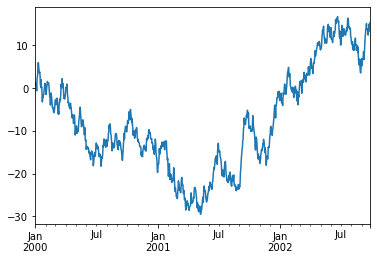

In [99]:
import matplotlib.pyplot as plt
plt.close("all")
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

In [100]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"])
df = df.cumsum()
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

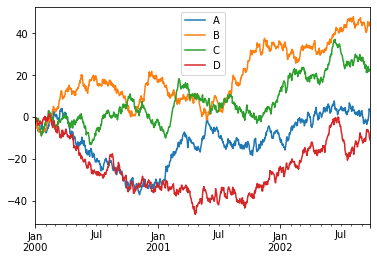

In [101]:
df.plot()

No handles with labels found to put in legend.


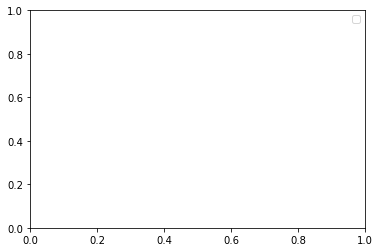

In [102]:
plt.legend(loc='best')

### 데이터 입출력

In [104]:
df.to_csv("foo.csv") #출력
pd.read_csv("foo.csv") #읽기

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.962640,-0.087245,-0.791656,-0.727271
1,2000-01-02,-3.084058,-0.942477,-0.621776,-0.934941
2,2000-01-03,-2.578316,-0.973265,-0.312064,-0.636182
3,2000-01-04,-3.023247,-1.676835,-0.336432,-1.559468
4,2000-01-05,-3.931310,-3.535079,-1.356528,-1.876945
...,...,...,...,...,...
995,2002-09-22,0.832656,43.637619,21.894432,-7.130810
996,2002-09-23,3.859398,43.702426,22.873121,-8.195611
997,2002-09-24,3.363116,43.613670,22.501729,-9.988166
998,2002-09-25,3.032199,45.326811,22.386243,-9.778284


In [106]:
df.to_hdf("foo.h5", "df") #hdf5, hdfStores에 쓰기
pd.read_hdf("foo.h5", "df") #읽기

,A,B,C,D
2000-01-01,-1.962640,-0.087245,-0.791656,-0.727271
2000-01-02,-3.084058,-0.942477,-0.621776,-0.934941
2000-01-03,-2.578316,-0.973265,-0.312064,-0.636182
2000-01-04,-3.023247,-1.676835,-0.336432,-1.559468
2000-01-05,-3.931310,-3.535079,-1.356528,-1.876945
...,...,...,...,...
2002-09-22,0.832656,43.637619,21.894432,-7.130810
2002-09-23,3.859398,43.702426,22.873121,-8.195611
2002-09-24,3.363116,43.613670,22.501729,-9.988166
2002-09-25,3.032199,45.326811,22.386243,-9.778284


In [107]:
df.to_excel("foo.xlsx", sheet_name="Sheet1") #excel 읽기
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.962640,-0.087245,-0.791656,-0.727271
1,2000-01-02,-3.084058,-0.942477,-0.621776,-0.934941
2,2000-01-03,-2.578316,-0.973265,-0.312064,-0.636182
3,2000-01-04,-3.023247,-1.676835,-0.336432,-1.559468
4,2000-01-05,-3.931310,-3.535079,-1.356528,-1.876945
...,...,...,...,...,...
995,2002-09-22,0.832656,43.637619,21.894432,-7.130810
996,2002-09-23,3.859398,43.702426,22.873121,-8.195611
997,2002-09-24,3.363116,43.613670,22.501729,-9.988166
998,2002-09-25,3.032199,45.326811,22.386243,-9.778284


### 감잡음(Gotchas)